In [1]:
!pip install logging
!pip install farm-haystack
!pip install sentence-transformers
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 1.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.4/764.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import logging

logging.basicConfig(format="%(levelname)s - %(name)s -  %(message)s", level=logging.WARNING)
logging.getLogger("haystack").setLevel(logging.INFO)

from haystack.nodes import DensePassageRetriever
from haystack.document_stores import InMemoryDocumentStore

INFO:haystack.telemetry:Haystack sends anonymous usage data to understand the actual usage and steer dev efforts towards features that are most meaningful to users. You can opt-out at anytime by manually setting the environment variable HAYSTACK_TELEMETRY_ENABLED as described for different operating systems in the [documentation page](https://docs.haystack.deepset.ai/docs/telemetry#how-can-i-opt-out). More information at [Telemetry](https://docs.haystack.deepset.ai/docs/telemetry).


In [16]:
# Here are the variables you might want to use instead of the set above
# in order to perform pretraining

doc_dir = "/content/drive/MyDrive/AIR Project"
train_filename_1 = "GermanQuAD_train_converted.json"
dev_filename_1 = "GermanQuAD_test_converted.json"

query_model = "facebook/dpr-question_encoder-single-nq-base"
passage_model = "facebook/dpr-ctx_encoder-single-nq-base"
train_empty = "GermanDPR_empty_train_test.json"
model_dir = "/content/drive/MyDrive/AIR Project/finetune_model_GermanQuAD"
train_filename_2 = "GermanDPR_train.json"
dev_filename_2 = "GermanDPR_test.json"
model_dir2 = "/content/drive/MyDrive/AIR Project/finetune_model_GermanDPR"
model_dir_empty = "/content/drive/MyDrive/AIR Project/empty"

In [11]:
retriever_base_model = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)
retriever_base_model.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ 

In [12]:
retriever_QuAD_fine = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)
retriever_QuAD_fine.train(
    data_dir=doc_dir,
    train_filename=train_filename_1,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ 

In [13]:
# Load the fine-tuned model
retriever_DPR_fine = DensePassageRetriever(document_store=InMemoryDocumentStore())
retriever_DPR_fine.load(load_dir=model_dir, document_store=InMemoryDocumentStore())

retriever_DPR_fine.train(
    data_dir=doc_dir,
    train_filename=train_filename_2,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir2,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.den

In [14]:
retriever_base_loaded = DensePassageRetriever(
    document_store=InMemoryDocumentStore(),
    query_embedding_model=query_model,
    passage_embedding_model=passage_model,
    max_seq_len_query=64,
    max_seq_len_passage=256,
)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
INFO:haystack.modeling.model.language_model:Auto-detected model language: english
INFO:haystack.modeling.model.language_model:Auto-detected model language: english


In [17]:

retriever_base_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 96.03 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:09<00:00,  1.89s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mod

In [18]:
retriever_base_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 112.11 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:04<00:00,  1.59s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data

In [19]:
retriever_QuAD_fine_loaded = DensePassageRetriever.load(model_dir, document_store=None)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.dense:DPR model loaded from /content/drive/MyDrive/AIR Project/finetune_model_GermanQuAD


In [20]:
retriever_QuAD_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 147.65 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:06<00:00,  1.34s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mo

In [21]:
retriever_QuAD_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 83.46 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:05<00:00,  1.67s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_

In [22]:
retriever_PDR_fine_loaded = DensePassageRetriever.load(model_dir2, document_store=None)

INFO:haystack.modeling.utils:Using devices: CUDA:0 - Number of GPUs: 1
INFO:haystack.nodes.retriever.dense:DPR model loaded from /content/drive/MyDrive/AIR Project/finetune_model_GermanDPR


In [23]:
retriever_PDR_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_1,
    test_filename=dev_filename_1,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 153.04 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanQuAD_test_converted.json
Preprocessing dataset: 100%|██████████| 5/5 [00:06<00:00,  1.29s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.mo

In [24]:
retriever_PDR_fine_loaded.train(
    data_dir=doc_dir,
    train_filename=train_empty,
    dev_filename=dev_filename_2,
    test_filename=dev_filename_2,
    n_epochs=1,
    batch_size=4,
    grad_acc_steps=8,
    save_dir=model_dir_empty,
    evaluate_every=3000,
    embed_title=True,
    num_positives=1,
    num_hard_negatives=1,
)

INFO:haystack.modeling.data_handler.data_silo:
Loading data into the data silo ... 
              ______
               |o  |   !
   __          |:`_|---'-.
  |__|______.-/ _ \-----.|
 (o)(o)------'\ _ /     ( )
 
INFO:haystack.modeling.data_handler.data_silo:LOADING TRAIN DATA
INFO:haystack.modeling.data_handler.data_silo:==================
INFO:haystack.modeling.data_handler.data_silo:Loading train set from: /content/drive/MyDrive/AIR Project/GermanDPR_empty_train_test.json 
Preprocessing dataset: 100%|██████████| 1/1 [00:00<00:00, 73.52 Dicts/s]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_handler.data_silo:LOADING DEV DATA
INFO:haystack.modeling.data_handler.data_silo:=================
INFO:haystack.modeling.data_handler.data_silo:Loading dev set from: /content/drive/MyDrive/AIR Project/GermanDPR_test.json
Preprocessing dataset: 100%|██████████| 3/3 [00:05<00:00,  1.88s/ Dicts]
INFO:haystack.modeling.data_handler.data_silo:
INFO:haystack.modeling.data_

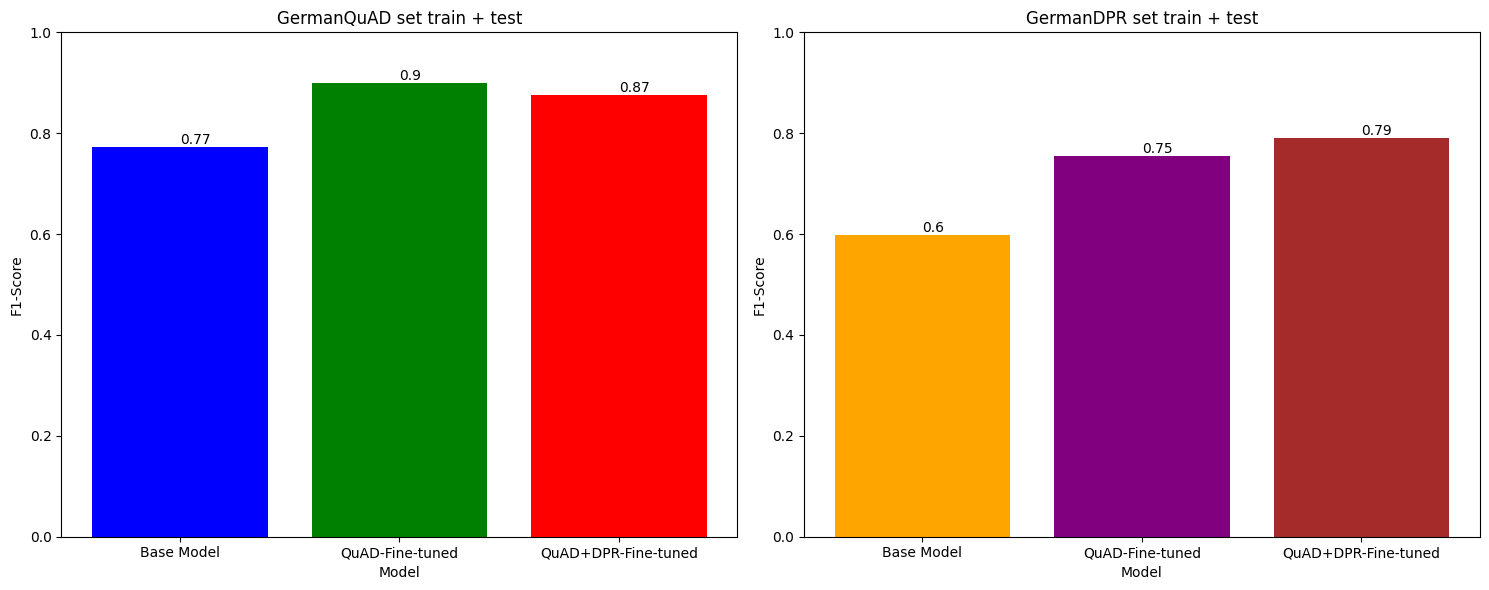

In [38]:
import matplotlib.pyplot as plt

models = ['Base Model', 'QuAD-Fine-tuned', 'QuAD+DPR-Fine-tuned']
f1_scores_germaquad = [0.7731397459165156, 0.8992740471869328, 0.8747731397459164]
f1_scores_germandpr = [0.5980487804878049, 0.7541463414634146, 0.791219512195122]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# germaquad
bars1 = axes[0].bar(models, f1_scores_germaquad, color=['blue', 'green', 'red'])
axes[0].set_title('GermanQuAD set train + test')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('F1-Score')
axes[0].set_ylim(0, 1)
for bar in bars1:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# germandpr
bars2 = axes[1].bar(models, f1_scores_germandpr, color=['orange', 'purple', 'brown'])
axes[1].set_title('GermanDPR set train + test')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('F1-Score')
axes[1].set_ylim(0, 1)
for bar in bars2:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()

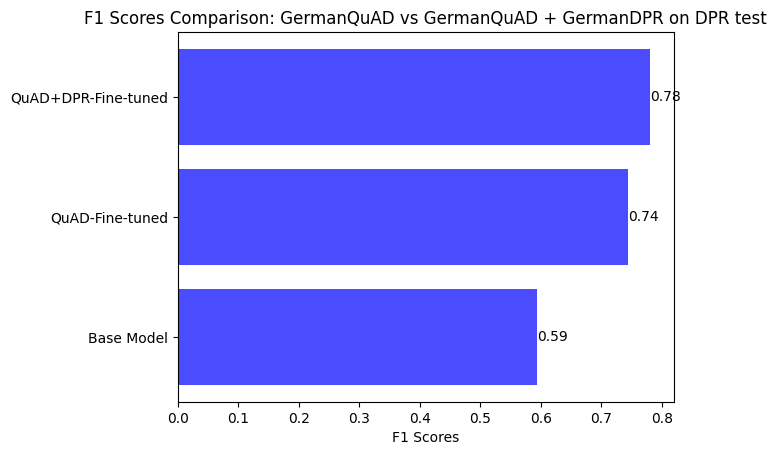

In [40]:
f1_scores_germandpr_test = [0.5941463414634146, 0.744390243902439, 0.7804878048780488]
fig, ax = plt.subplots()
bars = ax.barh(models, f1_scores_germandpr_test, color='blue', alpha=0.7, label='GermaQuAD')

ax.set_xlabel('F1 Scores')
ax.set_title('F1 Scores Comparison: GermanQuAD vs GermanQuAD + GermanDPR on DPR test')

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',ha='left', va='center')

plt.show()

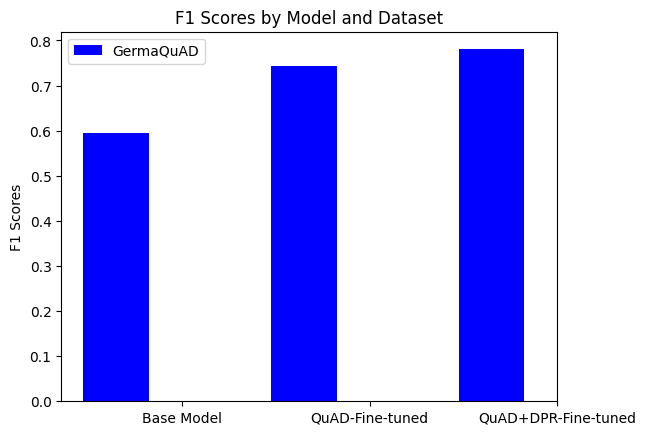

In [31]:
import numpy as np

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, f1_scores_germandpr_test, width, label='GermaQuAD', color='blue')

ax.set_ylabel('F1 Scores')
ax.set_title('F1 Scores by Model and Dataset')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()